# <font color="Turquoise"><b>Práctica 3: Introducción al Clustering</b></font>

Elaborado con el apoyo de:
Luis Fernando Becerra, BEDA Aprendizaje de Máquinas 2024-1S - 2025-1S
Andres Esteban Marin Manco, BEDA Aprendizaje de Máquinas 2025-1S

# <font color="LightPink"><b>Clustering - Parte I</b></font>


<p align="center">
  <img src="https://dezyre.gumlet.io/images/blog/clustering-algorithms-in-machine-learning/Segmenting_Data_with_Clustering_Algorithms.png?w=376&dpr=2.6" width="400"/>
</p>

<br>

En esta primera parte, vamos a utilizar los algoritmos de Kmeans, aglomerativo, DBSCAN y Spectral Clustering en un conjunto de datos de juguete, para analizar las ventajas y desventajas de cada uno de los métodos, efectos de inicialización y selección de parámetros

## <font color="LightPink"><b>1. Generación de Datos Sintéticos</b></font>

Utilizaremos funciones de `sklearn.datasets` para crear conjuntos de datos con diferentes formas geométricas, lo cual nos ayudará a observar cómo los algoritmos se comportan con distribuciones variadas.

- `make_blobs`: genera nube de puntos con distribución gaussiana (clusters esféricos). Por defecto, generar 3.
- `make_moons`: genera un conjunto de datos distirbuidos en dos semicirculos.
- `make_circles`: genera un conjunto de datos distribuidos en dos circulos (uno dentro del otro) en dos dimensiones.

In [1]:
#Importar librerias
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

Con el siguiente proceso es posible generar nubes de puntos **sintéticos**.

In [2]:
#
# Generamos 500 muestras para cada dataset
n_samples = 500
seed = 30

# Nubes de puntos gaussianos (3 clusters)
blobs = datasets.make_blobs(
    n_samples=n_samples,
    centers=3,
    random_state=seed,
)

#
# Cículos concentricos (2 clusters)
noisy_circles = datasets.make_circles(
    n_samples=n_samples,
    factor=0.5,
    noise=0.05,
    random_state=seed,
)

# Semicírculos (2 clusters)
noisy_moons = datasets.make_moons(
    n_samples=n_samples,
    noise=0.05,
    random_state=seed,
)

# Nubes de puntos gaussianos (10 clusters)
blobs10 = datasets.make_blobs(
    n_samples=n_samples,
    centers=10,
    random_state=seed,
)


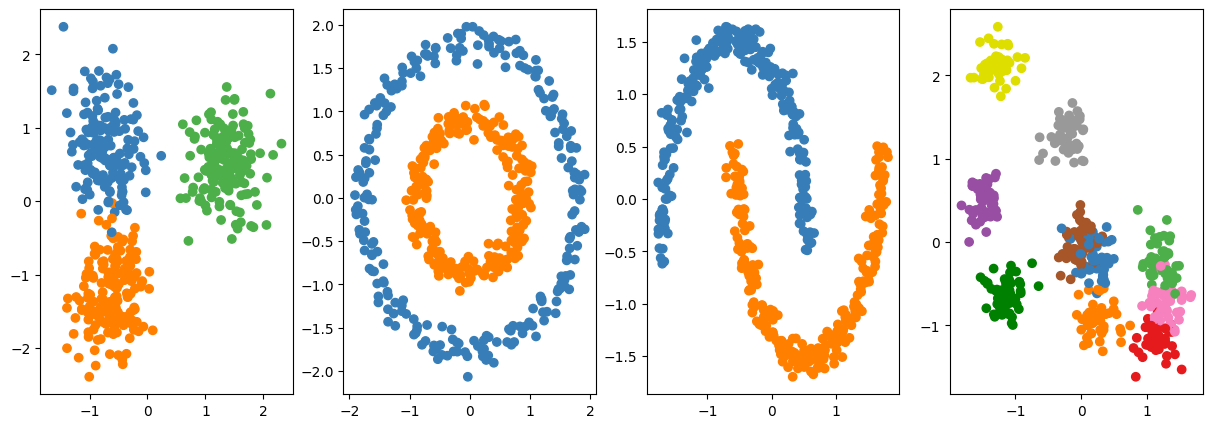

In [3]:
#
# Cargar instancia para estandarizar
scaler = StandardScaler()

# Gráfica de los datasets
colors = np.array(["#377eb8",
                   "#ff7f00",
                   "#4daf4a",
                   "#f781bf",
                   "#a65628",
                   "#984ea3",
                   "#999999",
                   "#e41a1c",
                   "#dede00",
                   "#008000",
                   "#0343DF",
                   "#7FFF00",
                   "#ED0DD9",
                   "#FBDD7E",
                   "#FFA500"])
plt.figure(figsize=(15, 5))

data_sets = [(blobs),(noisy_circles),(noisy_moons),(blobs10)]
i=1
for dataset in data_sets:
  X = scaler.fit_transform(dataset[0])
  y = dataset[1]
  plt.subplot(1,len(data_sets),i)
  plt.scatter(X[:, 0], X[:, 1],color=colors[y])
  i+=1

## <font color="LightPink"><b>K-Means</b></font>


<p align="center">
  <img src="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/aop-spectral-py/classification/kmeans2d.gif" width="500"/>
</p>

<br>

El término `K-Means` fue utilizado por primera vez por James MacQueen en 1967, aunque la idea se remonta a Hugo Steinhaus en 1956. El algoritmo estándar fue propuesto por primera vez por Stuart Lloyd, de los Laboratorios Bell, en 1957 como técnica para la modulación por impulsos codificados, aunque no se publicó como artículo en una revista hasta 1982.

`K-Means` es el algoritmo de *clustering* más **popular** y **utilizado**. Se caracteriza por ser **fácil de implementar**, **computacionalmente rápido** y **escalable**. Además, permite ajustar la granularidad de los grupos generados modificando el número de clusters (`k`), lo que puede dar lugar a subagrupamientos.

No obstante, su desempeño está limitado a **agrupamientos de tipo convexo** y requiere que el número de clusters (`k`) sea definido **previamente**. También es **sensible a la inicialización** de los centroides, lo que puede afectar la calidad de los resultados.

Este algoritmo tiene aplicaciones en múltiples áreas, tales como:

- Geoestadística
- Visión por computador
- Segmentación de mercados
- Estudios sísmicos
- Clasificación de uso del suelo


In [ ]:
#
# Importar k-means
from sklearn.cluster import KMeans

Primero vamos aplicarlo al dataset de nube de puntos con tres clusters. En esta primera parte del experimento vamos a asumir que conocemos el número de clusters.

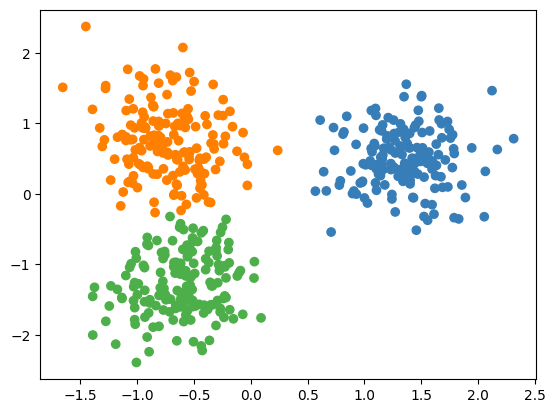

In [5]:
#
# Organizamos los datos
X = scaler.fit_transform(blobs[0])  # Usamos el primer dataset como ejemplo

# Y: Solo por referencia, no se utilizan en el algoritmo
y = blobs[1]  # Etiquetas reales, no se usan en KMeans

#
# Configuramos los parametros
# Ingresamos número de clusters 'n_clusters'
# Seleccionamos la inicialización aleatoria
# Definimos cuantas veces se repite el proceso n_init = 10 por defecto
kmeans = KMeans(
    n_clusters=3,  # Número de clusters
    init='random',
    n_init=10,  # Número de inicializaciones
    max_iter=300,
)

# Entrenamos el modelo
kmeans.fit(X)

# Obtenemos las etiquetas de pertenencia
y_pred_kmeans = kmeans.labels_


# Graficamos el resultado
plt.scatter(X[:,0],X[:,1],color=colors[y_pred_kmeans])
plt.show()


Una forma de evaluar el resultado es mediante la suma de las distancias al cuadrado de cada muestra al centroide de su cluster, este parametro se calcula durante el entrenamiento, y queda almacenado en el atributo inertia_.



In [6]:
#
# Mostrar la suma de la distancia al cuadrado al centroide
print(kmeans.inertia_)

148.51196245743637


Vamos aplicar el metodo `K-Means` a los **cuatro conjuntos de datos sintéticos** generados previamente:



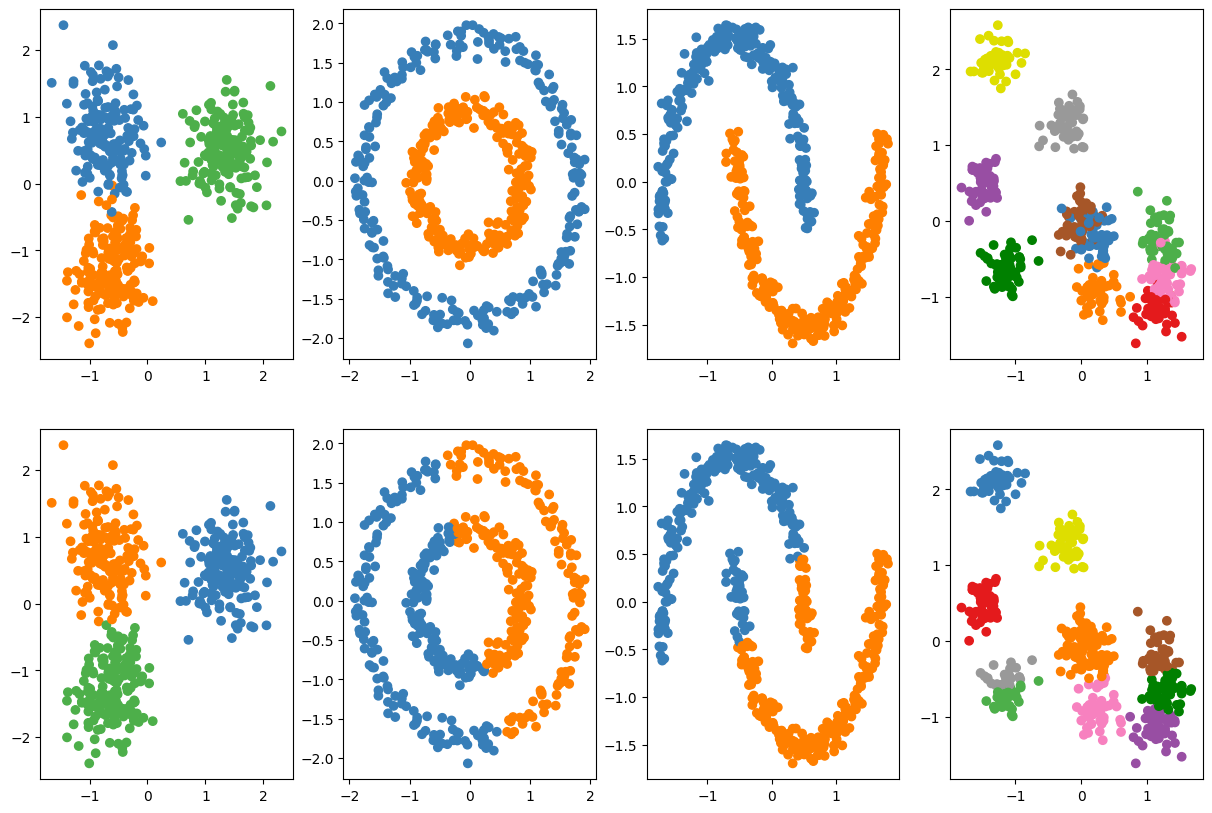

In [7]:
#
# Organizamos los datos
data_sets = [(blobs), (noisy_circles), (noisy_moons), (blobs10), ]
sum_dist = []

# El número de clusters a buscar en cada conjunto
data_n = [3,2,2,10, ]
plt.figure(figsize=(15,10))

# Vamos a realizar un ciclo para agrupar cada conjunto de datos
for i, dataset in enumerate(data_sets):
    X = scaler.fit_transform(dataset[0])
    y = dataset[1]
    #Graficamos los datos originales
    plt.subplot(2,len(data_sets),i+1)
    plt.scatter(X[:,0],X[:,1],color=colors[y])
    #Configuramos KMeans
    kmeans = KMeans(
        n_clusters=data_n[i],  # Número de clusters
        init='random',
        n_init=10,  # Número de inicializaciones
        max_iter=300,
    )
    
    #Entrenamos el modelo
    kmeans.fit(X)
    #Extraemos las etiquetas y la suma de la distancias
    y_pred_kmeans = kmeans.labels_
    sum_dist.append(kmeans.inertia_)
    #Graficamos los clusters finales
    plt.subplot(2,len(data_sets),i+5)
    plt.scatter(X[:,0],X[:,1],color=colors[y_pred_kmeans])

Nota importante: los colores solo permiten establecer la correspondencia a un mismo clusters, más no permite comparar entre los datos originales y los obtenidos con el algoritmo.

In [9]:
#
# Mostramos la suma de distancias al cuadrado a los centroides
sum_dist

[148.51196245743637, 634.1376363866174, 418.9181295142994, 28.072597020041407]

## <font color="LightPink"><b>Métodos Jerárquicos Aglomerativos</b></font>


<p align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/0*848julTIRU1JZYft" width="500"/>
</p>

<br>


Los métodos `jerárquicos aglomerativos` producen una serie anidada de particiones. La representación de los resultados se realiza mediante un `dendrograma`, el cual muestra la agrupación jerárquica de los patrones y los distintos niveles de *similitud* entre ellos.

Aunque estos métodos **no requieren definir previamente el número de clusters**, sí es necesario **determinar un punto de corte en el dendrograma** para obtener la partición final. El enfoque aglomerativo se caracteriza por comenzar con **un cluster por cada muestra**, e ir **fusionando progresivamente** los clusters más similares hasta alcanzar la estructura deseada.

Estos algoritmos son *conceptualmente simples* y presentan un **buen desempeño en conjuntos de datos pequeños**. Sin embargo, pueden tener dificultades cuando se enfrentan a **formas de clusters no convexas o de densidad variable**.

Las aplicaciones de los métodos jerárquicos aglomerativos incluyen:

- **Reconocimiento de patrones**
- **Segmentación de imágenes**
- **Redes de sensores inalámbricos**
- **Planeación urbana**
- **Análisis de datos espaciales**



In [11]:
#
# Importar libreria
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

Inicialmente utilizaremos la **distancia euclidiana** con el método de **enlace simple** para construir el dendrograma y realizar la fusión de clusters.

Existen diferentes tipos de enlace con los cuales se puede experimentar, cada uno con implicaciones distintas en la forma como se agrupan los datos:

- **Simple**: utiliza la **distancia mínima** entre un par de observaciones de dos clusters.
- **Completo**: utiliza la **distancia máxima** entre un par de observaciones de dos clusters.
- **Promedio**: emplea la **distancia promedio** entre todos los pares posibles de observaciones entre dos clusters.
- **Ward**: fusiona los clusters minimizando la **varianza total dentro de los grupos** resultantes.


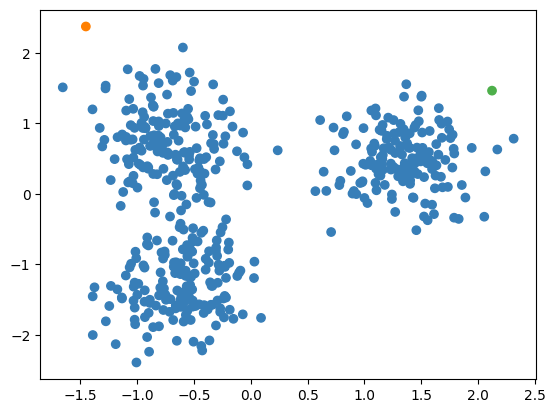

In [14]:
#Organizamos los datos
X = scaler.fit_transform(blobs[0])
y = blobs[1] #Solo por referencia, no se utilizan en el algoritmo

# Configuramos los parametros
# Ingresamos número de clusters 'n_clusters'
# Usamos euclidina y enlace simple
clustering = AgglomerativeClustering(
    n_clusters=3,  
    metric='euclidean',
    linkage='single',
)

# Entrenamos el modelo
clustering.fit(X)

# Obtenemos las etiquetas de pertenencia
y_pred_agglo = clustering.labels_

# Graficamos el resultado
plt.scatter(X[:, 0], X[:, 1],color=colors[y_pred_agglo])
plt.show()

Comparemos que ocurre con otros enlaces.
Nota: para el enlace ward solo acepta la distancia euclidiana.

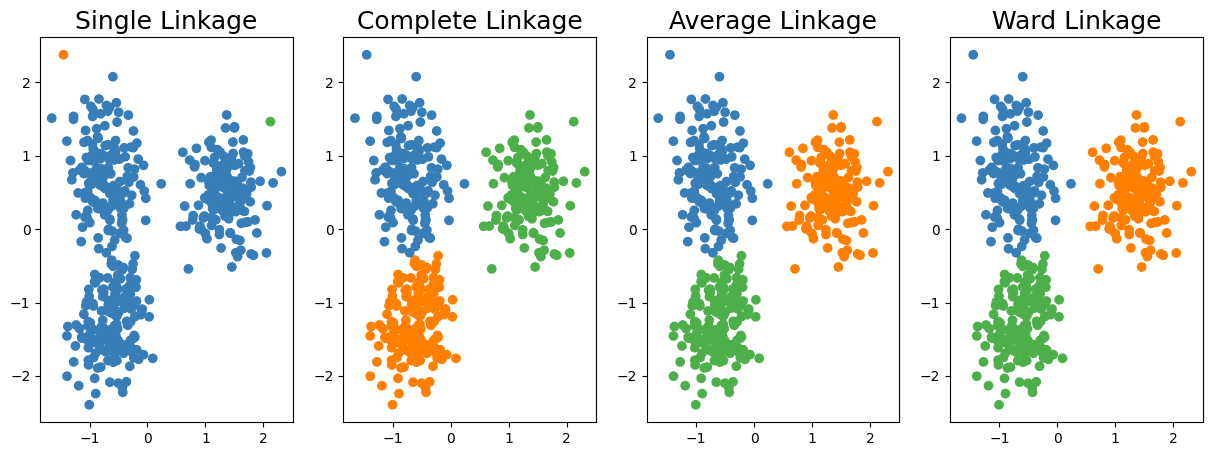

In [15]:
#Enlace completo
clustering = AgglomerativeClustering(
    n_clusters=3,
    linkage='complete',
    metric='euclidean',
)
clustering.fit(X)
y_pred_aggloC = clustering.labels_

# Enlace promedio
clustering = AgglomerativeClustering(
    n_clusters=3,
    linkage='average',
    metric='euclidean',
)
clustering.fit(X)
y_pred_aggloA = clustering.labels_

#Enlace Ward
clustering = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward',
    metric='euclidean',
)
clustering.fit(X)
y_pred_aggloW = clustering.labels_


#Graficamos los clusters finales
plt.figure(figsize=(15, 5))
plt.subplot(1,4,1)
plt.scatter(X[:, 0], X[:, 1],color=colors[y_pred_agglo])
plt.title('Single Linkage', size=18)
plt.subplot(1,4,2)
plt.scatter(X[:, 0], X[:, 1],color=colors[y_pred_aggloC])
plt.title('Complete Linkage', size=18)
plt.subplot(1,4,3)
plt.scatter(X[:, 0], X[:, 1],color=colors[y_pred_aggloA])
plt.title('Average Linkage', size=18)
plt.subplot(1,4,4)
plt.scatter(X[:, 0], X[:, 1],color=colors[y_pred_aggloW])
plt.title('Ward Linkage', size=18)
plt.show()

Vamos aplicar el metodo `Jerárquicos Aglomerativos` a los **cuatro conjuntos de datos sintéticos** generados previamente:



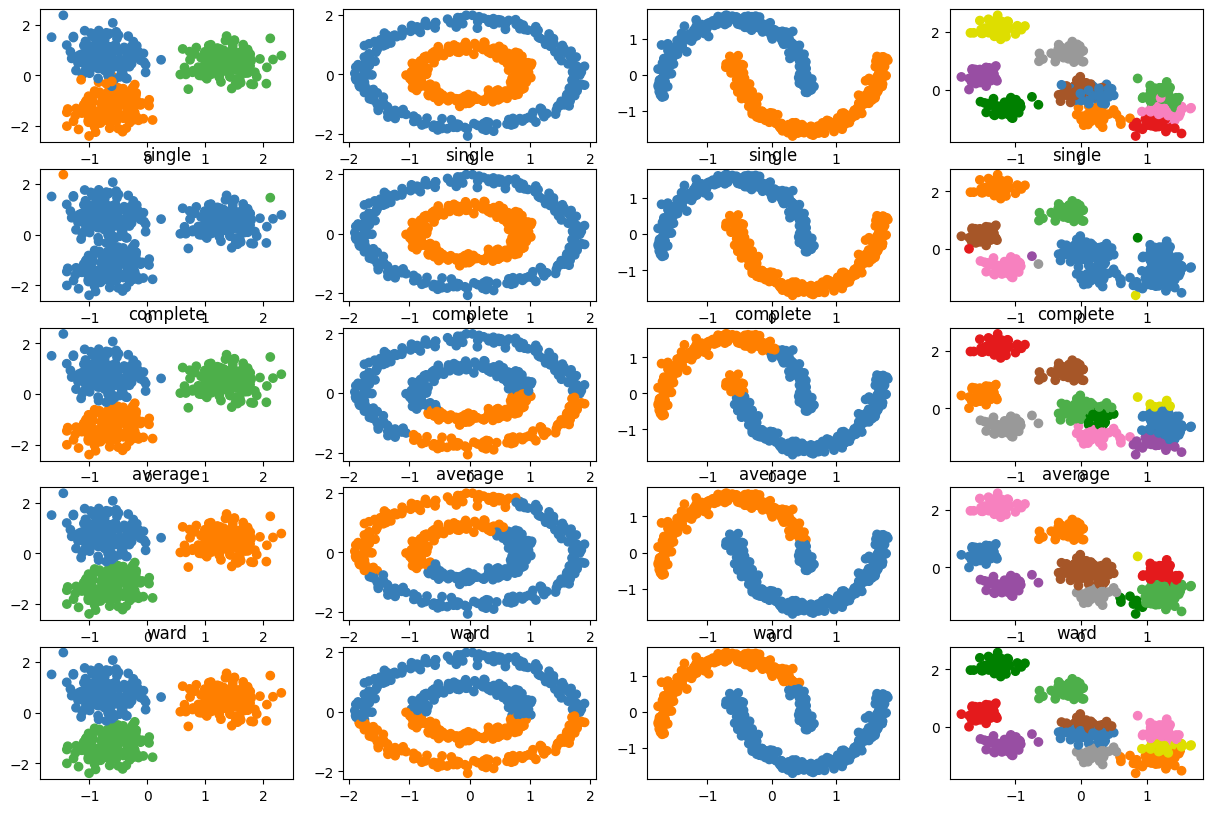

In [16]:
#Organizamos los datos
data_sets = [(blobs),(noisy_circles),(noisy_moons),(blobs10)]
type_linkage = ['single', 'complete', 'average', 'ward']
#El número de clusters a buscar en cada conjunto
data_n = [3,2,2,10]
plt.figure(figsize=(15, 10))
#Vamos a realizar un ciclo para agrupar cada conjunto de datos
for i, dataset in enumerate(data_sets):
  X = scaler.fit_transform(dataset[0])
  y = dataset[1]
  #Graficamos los datos originales
  plt.subplot(5,len(data_sets),i+1)
  plt.scatter(X[:, 0], X[:, 1],color=colors[y])
  for j, link in enumerate(type_linkage):
    #Configuramos, entrenamos y extraemos etiquetas
    clustering = AgglomerativeClustering(
        n_clusters=data_n[i],
        metric='euclidean',
        linkage=link,
    )
    clustering.fit(X)
    y_pred_CA = clustering.labels_

    #Graficamos los clusters finales
    plt.subplot(5,len(data_sets),i+5+j*4)
    plt.scatter(X[:, 0], X[:, 1],color=colors[y_pred_CA])
    plt.title(link, size=12)

## <font color="LightPink"><b>DBSCAN</b></font>

<p align="center">
  <img src="https://miro.medium.com/v2/resize:fit:888/0*WFeUIkj3-vYk0_c7" width="300"/>
</p>

<br>

El algoritmo `DBSCAN` (*Density-Based Spatial Clustering of Applications with Noise*) fue propuesto por **Martin Ester**, **Hans-Peter Kriegel**, **Jörg Sander** y **Xiaowei Xu** en *1996*.

Se trata de un algoritmo de agrupamiento basado en *densidad*, capaz de identificar **clusters de forma arbitraria** (incluso no convexas) y de distintos tamaños. `DBSCAN` puede detectar **clusters rodeados por otros clusters**, y es **robusto frente al ruido y a los datos atípicos**.

A diferencia de métodos como `K-Means`, `DBSCAN` **no requiere especificar el número de clusters** a priori, pero sí depende de la correcta elección de dos parámetros: `eps` (radio de vecindad) y `min_samples` (mínimo de puntos por vecindad).

Este algoritmo se ha utilizado en aplicaciones como:

- **Revisión y análisis de literatura científica**
- **Procesamiento de imágenes satelitales**
- **Cristalografía de rayos X**
- **Detección de anomalías o outliers**


In [ ]:
#
# Importar librería
from sklearn.cluster import DBSCAN

Aplicaremos el algoritmo `DBSCAN` al conjunto de datos generado con `make_blobs`, el cual contiene **tres clusters bien definidos** en forma de nubes de puntos.

En esta primera prueba utilizaremos la **distancia euclidiana** como métrica por defecto y los siguientes parámetros:

- `eps = 0.5`: radio del vecindario considerado para la densidad
- `min_samples = 5`: número mínimo de puntos requeridos para formar un cluster



Estimated number of clusters: 2
Estimated number of noise points: 17


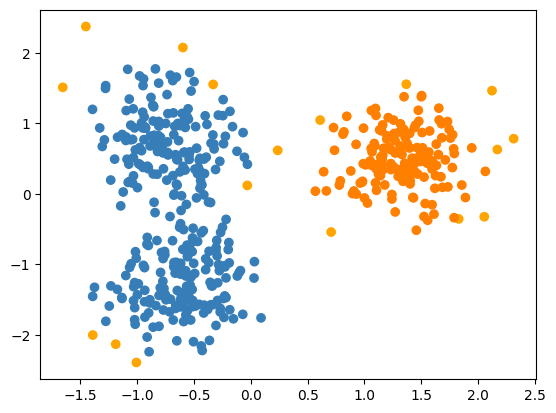

In [19]:
#
# Organizamos los datos
X = scaler.fit_transform(blobs[0])
y = blobs[1] #Solo por referencia, no se utilizan en el algoritmo

#Configuramos los parametros
#Usamos euclidina
clustering = DBSCAN(eps=0.3, min_samples=10, metric='euclidean') 

# Entrenamos el modelo
clustering.fit(X)
#
# Obtenemos las etiquetas de pertenencia
y_pred_db = clustering.labels_

# Graficamos el resultado
plt.scatter(X[:, 0], X[:, 1],color=colors[y_pred_db])

# Número de clusters - eliminando noise points
n_clusters_ = len(set(y_pred_db)) - (1 if -1 in y_pred_db else 0)
n_noise_ = list(y_pred_db).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

El algoritmo `DBSCAN` es **altamente sensible** a la elección de los parámetros `eps` y `min_samples`.

Estimated number of clusters: 5
Estimated number of noise points: 1


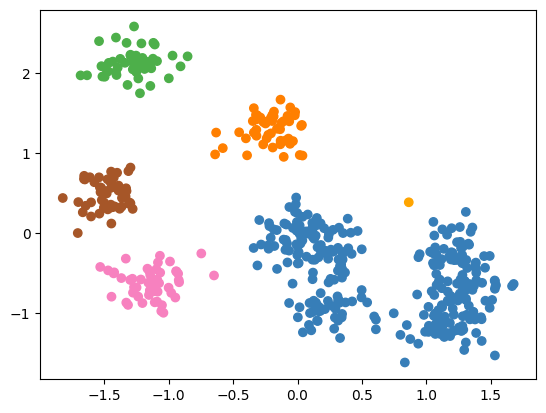

In [21]:
#Configuramos los parametros

#Entrenamos el modelo
clustering.fit(X)
#Obtenemos las etiquetas de pertenencia
y_pred_db = clustering.labels_
#Graficamos el resultado
plt.scatter(X[:, 0], X[:, 1],color=colors[y_pred_db])
#Numero de clusters - eliminando noise points
n_clusters_ = len(set(y_pred_db)) - (1 if -1 in y_pred_db else 0)
n_noise_ = list(y_pred_db).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Vamos aplicar el metodo `DBSCAN` a los **cuatro conjuntos de datos sintéticos** generados previamente:



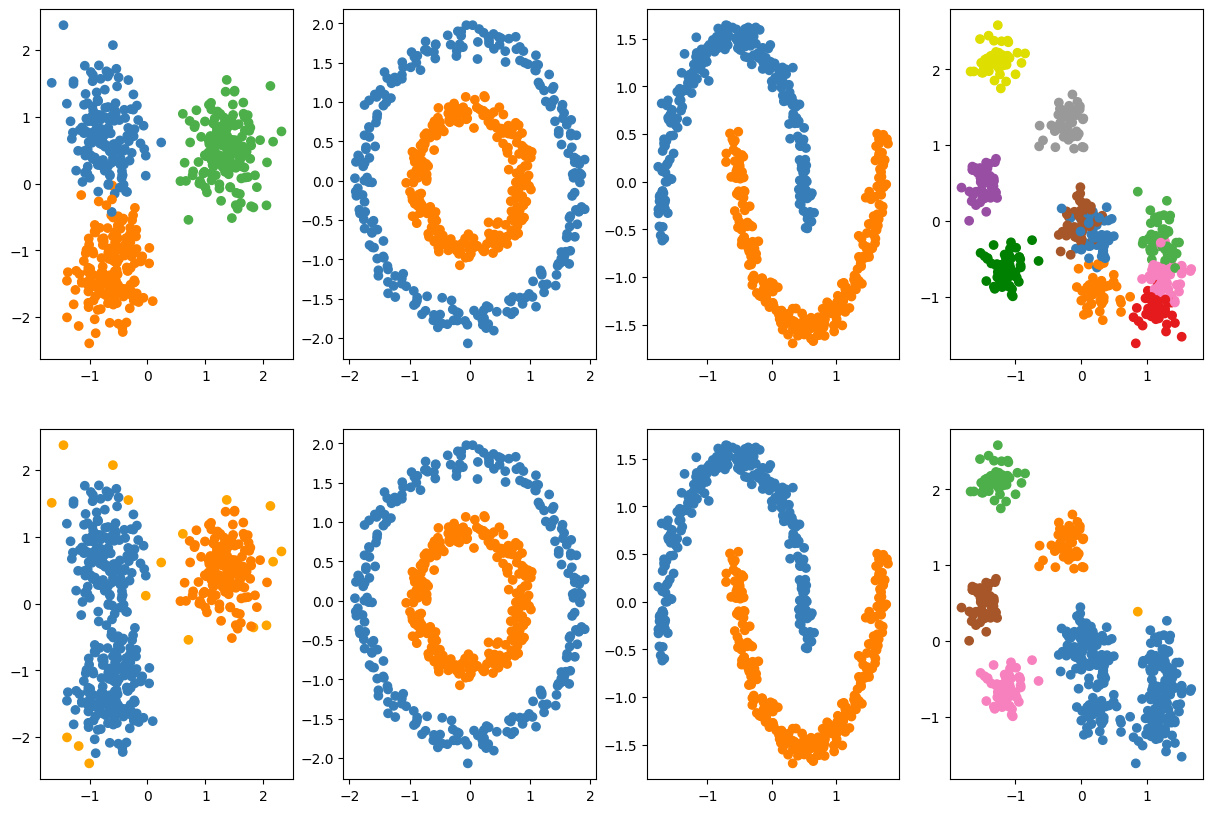

In [20]:
#Organizamos los datos
data_sets = [(blobs),(noisy_circles),(noisy_moons),(blobs10)]
sum_dist = []
#El número de clusters a buscar en cada conjunto
data_n = [3,2,2,10]
plt.figure(figsize=(15, 10))
#Vamos a realizar un ciclo para agrupar cada conjunto de datos
for i, dataset in enumerate(data_sets):
  X = scaler.fit_transform(dataset[0])
  y = dataset[1]
  #Graficamos los datos originales
  plt.subplot(2,len(data_sets),i+1)
  plt.scatter(X[:, 0], X[:, 1],color=colors[y])
  #Configuramos DBSCAN

  #Entrenamos el modelo
  clustering.fit(X)
  #Extraemos las etiquetas
  y_pred_DB = clustering.labels_
  #Graficamos los clusters finales
  plt.subplot(2,len(data_sets),i+5)
  plt.scatter(X[:, 0], X[:, 1],color=colors[y_pred_DB])

## <font color="LightPink"><b>Spectral Clustering</b></font>

<p align="center">
  <img src="https://sandipanweb.wordpress.com/wp-content/uploads/2016/07/circles1.gif?w=676" width="500"/>
</p>

<br>


El método `Spectral Clustering` utiliza el **espectro (valores propios)** de una `matriz de similaridad` para proyectar los datos en un espacio de menor dimensión y luego realizar el agrupamiento.

A partir de una matriz de similaridad —que representa los datos como un `grafo`— se construye una `matriz laplaciana`. Sobre esta matriz se calculan los **k vectores propios más significativos**, y posteriormente se aplica el algoritmo `K-Means` en ese nuevo espacio reducido para obtener los grupos finales.

Existen diversas definiciones del `Laplaciano del grafo`, dependiendo del tipo de normalización aplicada.

Entre las aplicaciones destacadas de este enfoque se encuentra la **segmentación de imágenes**, debido a su capacidad para capturar relaciones complejas y estructuras no lineales en los datos.


In [25]:
#
# Importar librería
from sklearn.cluster import SpectralClustering

Primero vamos a aplicar el algoritmo `Spectral Clustering` al dataset de nube de puntos con tres clusters.

Entre los parámetros a incluir se encuentran:

- `n_clusters`: obligatorio para este algoritmo.
- `n_init`: número de veces que se ejecuta `K-Means` con diferentes semillas. Por defecto es `10`.
- `affinity`: define la construcción de la matriz de afinidad. Por defecto es `'rbf'`, pero también puede usarse `'nearest_neighbors'`.

Estos parámetros determinan cómo se forma la matriz laplaciana y cómo se realiza la agrupación final en el espacio reducido.




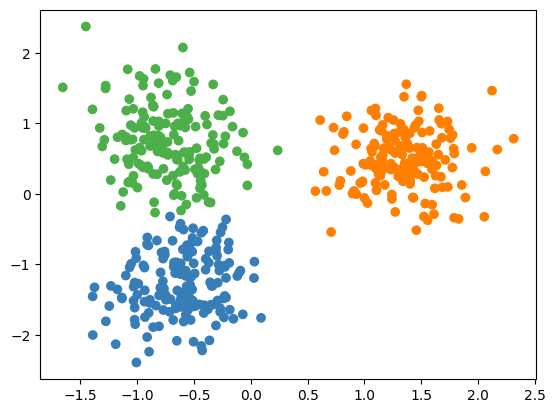

In [27]:
#
# Organizamos los datos
X = scaler.fit_transform(blobs[0])
y = blobs[1] #Solo por referencia, no se utilizan en el algoritmo

# Configuramos los parámetros
clustering = SpectralClustering(
    n_clusters=3,  # Número de clusters
    affinity='rbf',  # Usamos vecinos más cercanos
    gamma=0.1,
    n_init=10,  # Número de inicializaciones
)

# Entrenamos el modelo
clustering.fit(X)

# Obtenemos las etiquetas de pertenencia
y_pred_SC = clustering.labels_

# Graficamos el resultado
plt.scatter(X[:, 0], X[:, 1],color=colors[y_pred_SC])
plt.show()

Vamos aplicar el metodo `Spectral Clustering` a los **cuatro conjuntos de datos sintéticos** generados previamente:


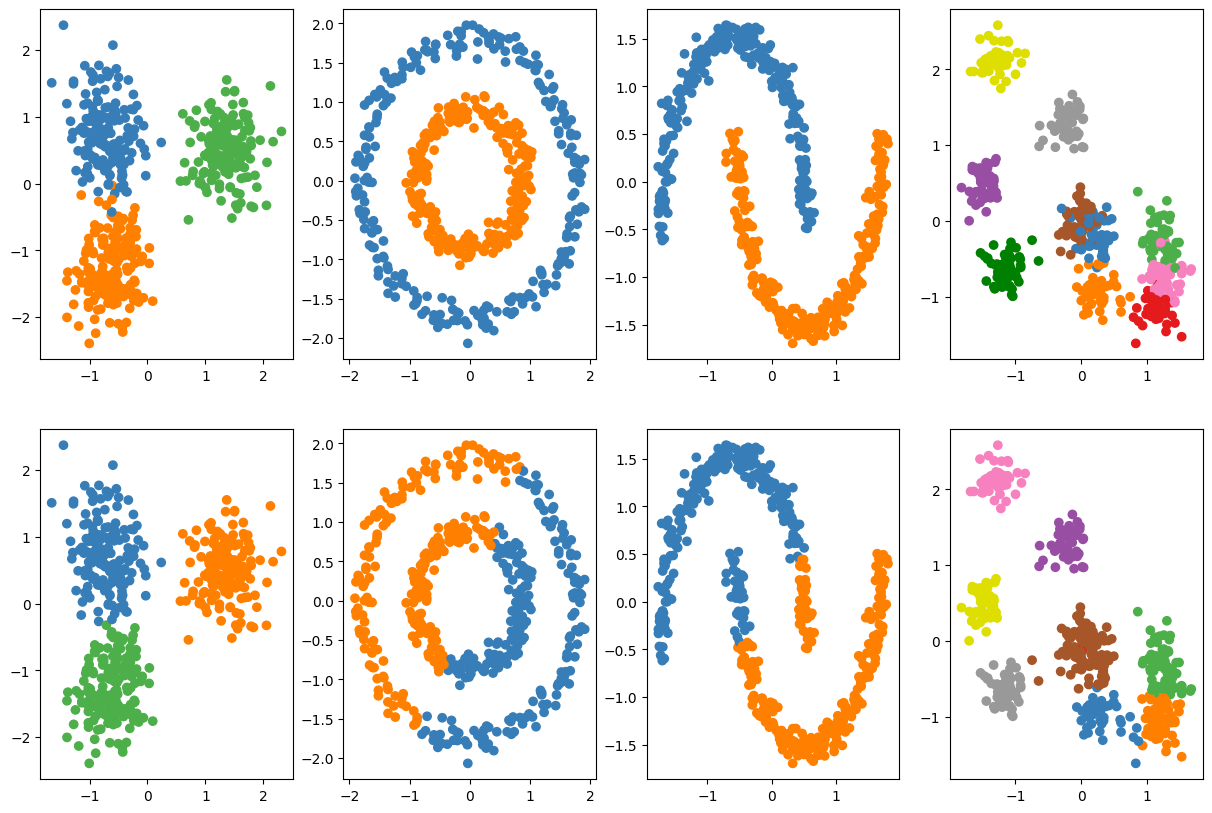

In [28]:
#Organizamos los datos
data_sets = [(blobs),(noisy_circles),(noisy_moons),(blobs10)]
sum_dist = []
#El número de clusters a buscar en cada conjunto
data_n = [3,2,2,10]
plt.figure(figsize=(15, 10))
#Vamos a realizar un ciclo para agrupar cada conjunto de datos
for i, dataset in enumerate(data_sets):
  X = scaler.fit_transform(dataset[0])
  y = dataset[1]
  #Graficamos los datos originales
  plt.subplot(2,len(data_sets),i+1)
  plt.scatter(X[:, 0], X[:, 1],color=colors[y])
  #Configuramos Spectral Clustering
  #clustering = SpectralClustering(n_clusters=data_n[i],n_init=10,affinity='rbf',gamma=1)
  clustering = SpectralClustering(
      n_clusters=data_n[i],  # Número de clusters
      n_init=10,  # Número de inicializaciones
      affinity='rbf',  # Usamos vecinos más cercanos
      gamma=0.1,
  )
   #Entrenamos el modelo
  clustering.fit(X)
   #Extraemos las etiquetas
  y_pred_SC = clustering.labels_
  #Graficamos los clusters finales
  plt.subplot(2,len(data_sets),i+5)
  plt.scatter(X[:, 0], X[:, 1],color=colors[y_pred_SC])
plt.show()